Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

In [2]:
import pandas as pd
import numpy as np

In [3]:
#data import
df = pd.read_csv(r'D:\\Python files\\Udemy\\Python for data science\\Py-DS-ML-Bootcamp-master\\Study Projects\\Bank_Note\\bank_note_data.csv')

In [16]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Image.Var,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Image.Skew,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Image.Curt,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [6]:
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='count'>

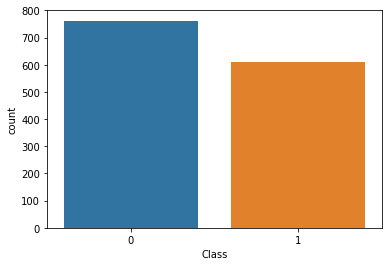

In [9]:
sns.countplot(x='Class', data=df)

<AxesSubplot:>

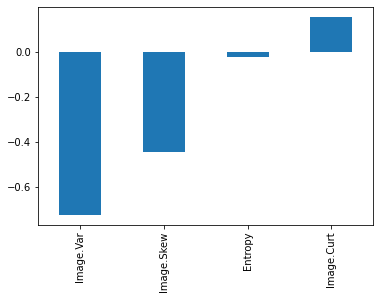

In [10]:
# to plot corr of 'benign_0__mal_1'
df.corr()['Class'][:-1].sort_values().plot(kind='bar')
# [:,-1] to drop the last value
# plot(kind='bar') to plot a graph
# Observation: Entropy can be eliminated with reference to the bar plot below, as the correlation is very low.

In [11]:
import matplotlib.pyplot as plt

<AxesSubplot:>

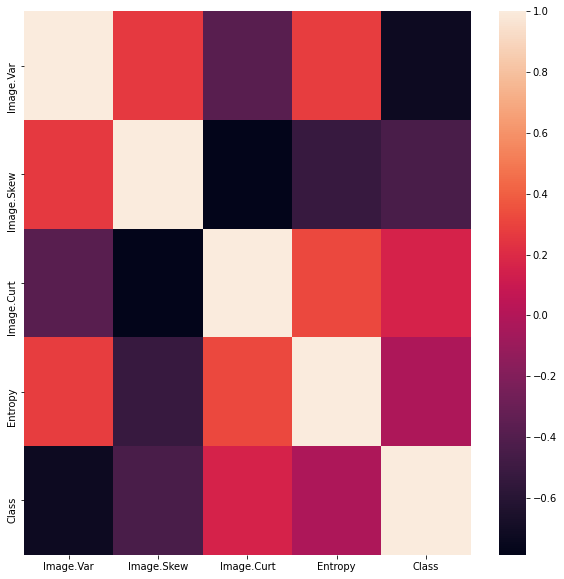

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [13]:
X = df.drop('Class', axis=1).values
y = df['Class'].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[0.71674275, 0.54637649, 0.32564568, 0.94697073],
       [0.63581622, 0.27693533, 0.57835497, 0.69559271],
       [0.5354196 , 0.77670328, 0.30506669, 0.72157724],
       ...,
       [0.79118621, 0.40966597, 0.32232079, 0.80529292],
       [0.39438519, 0.55980576, 0.19617227, 0.70100112],
       [0.52241381, 0.5920508 , 0.08532173, 0.72110714]])

In [20]:
X_test

array([[0.33901593, 0.98672618, 0.25725159, 0.08770925],
       [0.87149976, 0.49968721, 0.24864223, 0.87783809],
       [0.36313091, 0.26615931, 0.61570938, 0.78636306],
       ...,
       [0.39128428, 0.55020243, 0.57890697, 0.83257136],
       [0.63911905, 0.77459411, 0.22732155, 0.81317094],
       [0.68975762, 0.60407572, 0.34434444, 0.84950308]])

In [23]:
X_train.shape

(1029, 4)

In [24]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense, Dropout

In [35]:
model = Sequential()

model.add(Dense(4, activation='relu'))

model.add(Dense(2, activation='relu'))

# Binary Classification Problem last activation should be sigmoid
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
# This callback will stop the training when there is no improvement in the loss for three consecutive epochs.
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose=1, patience=25)
# patience = 25 means that the 25 epochs more will run after the min has been established

In [37]:
model.fit(x=X_train, y=y_train, epochs = 600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
33/33 [==============================] - 2s 12ms/step - loss: 0.6903 - val_loss: 0.6794
Epoch 2/600
33/33 [==============================] - 0s 4ms/step - loss: 0.6872 - val_loss: 0.6764
Epoch 3/600
33/33 [==============================] - 0s 4ms/step - loss: 0.6848 - val_loss: 0.6741
Epoch 4/600
33/33 [==============================] - 0s 4ms/step - loss: 0.6827 - val_loss: 0.6707
Epoch 5/600
33/33 [==============================] - 0s 4ms/step - loss: 0.6806 - val_loss: 0.6679
Epoch 6/600
33/33 [==============================] - 0s 4ms/step - loss: 0.6785 - val_loss: 0.6651
Epoch 7/600
33/33 [==============================] - 0s 4ms/step - loss: 0.6766 - val_loss: 0.6619
Epoch 8/600
33/33 [==============================] - 0s 4ms/step - loss: 0.6741 - val_loss: 0.6592
Epoch 9/600
33/33 [==============================] - 0s 4ms/step - loss: 0.6714 - val_loss: 0.6550
Epoch 10/600
33/33 [==============================] - 0s 4ms/step - loss: 0.6683 - val_loss: 0.6510
Epoch 11

<AxesSubplot:>

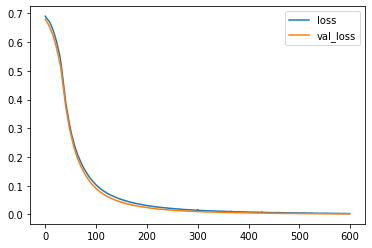

In [38]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [39]:
predictions = model.predict_classes(X_test)

C:\Users\pravirpolly\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test, predictions))
# accuracy is good measure for this model because the cancerous vs benign was a blanced or close to balanced

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       143

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



In [42]:
print(confusion_matrix(y_test, predictions))

[[200   0]
 [  0 143]]
